# Setup cell

In [1]:
import sys
# Setup cell
import os
from dotenv import load_dotenv
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
from endpoints import Endpoints
import logging
from metrics import Metrics
from platforms import Platforms
import github
import gitea_forgejo
import gitlab

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
# Load environment variables from .env file
load_dotenv()

# GitHub API Token
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
GITLAB_TOKEN = os.getenv("GITLAB_TOKEN")
GITEA_TOKEN = os.getenv("GITEA_TOKEN")
FORGEJO_TOKEN = os.getenv("FORGEJO_TOKEN")
BITBUCKET_TOKEN = os.getenv("BITBUCKET_TOKEN")

# Headers for different platforms
GITHUB_HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"}
GITEA_HEADERS = {"Authorization": f"token {GITEA_TOKEN}"}
FORGEJO_HEADERS = {"Authorization": f"token {FORGEJO_TOKEN}"}
GITLAB_HEADERS = {"Authorization": f"Bearer {GITLAB_TOKEN}"}
BITBUCKET_HEADERS = {"Authorization": f"Bearer {BITBUCKET_TOKEN}"}

# Create an instance of the platforms class
github_instance = github.GitHub(GITHUB_HEADERS)
gitea_instance = gitea_forgejo.GiteaForgejo(GITEA_HEADERS)
forgejo_instance = gitea_forgejo.GiteaForgejo(FORGEJO_HEADERS)
gitlab_instance = gitlab.Gitlab(GITLAB_HEADERS)

# Fetching Repositories from Github

In [6]:
# Fetch repositories
data = github_instance.fetch_repositories(11)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("github_repositories_test.csv", index=False)
    logger.info("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Fetching page 2...
INFO:base_platform:Fetching page 3...
INFO:base_platform:Fetching page 4...
INFO:base_platform:Fetching page 5...
INFO:base_platform:Fetching page 6...
INFO:base_platform:Fetching page 7...
INFO:base_platform:Fetching page 8...
INFO:base_platform:Fetching page 9...
INFO:base_platform:Fetching page 10...
INFO:__main__:Saved 1,000 repositories to 'github_repositories.csv'.


In [2]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "temp.csv"  # Your input file
df = pd.read_csv(csv_file)

github_instance.add_metric(df, Platforms.GITHUB, Metrics.ISSUE)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.COMMIT)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.BRANCH)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.PULL_REQUEST)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.CONTRIBUTOR)


# Save Updated CSV
output_file = "github_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for cloudfoundry/bosh-agent...
INFO:base_platform:Fetching data for cloudfoundry/bosh-agent...
INFO:base_platform:Fetching data for cloudfoundry/bosh-agent...
INFO:base_platform:Fetching data for cloudfoundry/bosh-agent...
INFO:base_platform:Fetching data for cloudfoundry/bosh-agent...
Done! Updated file saved as github_repos_with_metrics_test.csv


# Fetching Repositories from Gitea

In [7]:
# Fetch repositories
data = gitea_instance.fetch_repositories(21, Platforms.GITEA)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("gitea_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Fetching page 2...
INFO:base_platform:Fetching page 3...
INFO:base_platform:Fetching page 4...
INFO:base_platform:Fetching page 5...
INFO:base_platform:Fetching page 6...
INFO:base_platform:Fetching page 7...
INFO:base_platform:Fetching page 8...
INFO:base_platform:Fetching page 9...
INFO:base_platform:Fetching page 10...
INFO:base_platform:Fetching page 11...
INFO:base_platform:Fetching page 12...
INFO:base_platform:Fetching page 13...
INFO:base_platform:Fetching page 14...
INFO:base_platform:Fetching page 15...
INFO:base_platform:Fetching page 16...
INFO:base_platform:Fetching page 17...
INFO:base_platform:Fetching page 18...
INFO:base_platform:Fetching page 19...
INFO:base_platform:Fetching page 20...
Saved 1,000 repositories to 'github_repositories.csv'.


In [2]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "temp.csv"  # Your input file
df = pd.read_csv(csv_file)

gitea_instance.add_metric(df, Platforms.GITEA, Metrics.ISSUE)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.COMMIT)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.BRANCH)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.PULL_REQUEST)
gitea_instance.add_contributors(df, Platforms.GITEA)

# Save Updated CSV
output_file = "gitea_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for forgejo/forgejo...


KeyboardInterrupt: 

In [2]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "gitea_repositories_test.csv"  # Your input file
df = pd.read_csv(csv_file)

gitea_instance.add_contributors(df, Platforms.GITEA)

# Save Updated CSV
output_file = "gitea_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

Error fetching mc36/freeRtr: 202
Error fetching nekisoft/pvmk-appsdk: 202
Error fetching Michael-Slogar/proprietary_vendor_google_devices_komodo: 202
Error fetching David_best/SuperMaze: 202
Repository not found: Zhangliling/Zhangliling
Repository not found: l11lll1/aaa
Error fetching MiKueYu/SPT-LiveFleaPriceDB: 202
Error fetching gitea/gitea-mirror: 202
Error fetching actions/setup-java: 202
Repository not found: Vagizzz1/111
Repository not found: liilansty/project1
Repository not found: fantasize-technology/adam.web
Error fetching David_best/Control_points_remade: 202
Repository not found: divyanarayani/Divya_narayani
Error fetching olierachmansyah/Project1000S: 202
Repository not found: nhacaisp666asia/nhacaisp666asia
Error fetching MyEMS/MyEMS: 202
Error fetching andry81/contools: 202
Error fetching qq623987850/pyenv: 202
Repository not found: anjue/v
Repository not found: ingle23/Medprime_Reporting
Error fetching gentle/ppcat: 202
Repository not found: sheheer/Test
Repository not

# Fetching Repositories from Forgejo

In [8]:
# Fetch repositories
data = forgejo_instance.fetch_repositories(21, Platforms.FORGEJO)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("forgejo_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Fetching page 2...
INFO:base_platform:Fetching page 3...
INFO:base_platform:Fetching page 4...
INFO:base_platform:Fetching page 5...
INFO:base_platform:Fetching page 6...
INFO:base_platform:Fetching page 7...
INFO:base_platform:Fetching page 8...
INFO:base_platform:Fetching page 9...
INFO:base_platform:Fetching page 10...
INFO:base_platform:Fetching page 11...
INFO:base_platform:Fetching page 12...
INFO:base_platform:Fetching page 13...
INFO:base_platform:Fetching page 14...
INFO:base_platform:Fetching page 15...
INFO:base_platform:Fetching page 16...
INFO:base_platform:Fetching page 17...
INFO:base_platform:Fetching page 18...
INFO:base_platform:Fetching page 19...
INFO:base_platform:Fetching page 20...
Saved 1,000 repositories to 'github_repositories.csv'.


In [3]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "temp.csv"  # Your input file
df = pd.read_csv(csv_file)

forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.ISSUE)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.COMMIT)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.BRANCH)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.PULL_REQUEST)
forgejo_instance.add_contributors(df, Platforms.FORGEJO)

# Save Updated CSV
output_file = "forgejo_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for forgejo/forgejo...
INFO:base_platform:Fetching data for forgejo/forgejo...
INFO:base_platform:Fetching data for forgejo/forgejo...
INFO:base_platform:Fetching data for forgejo/forgejo...
Done! Updated file saved as forgejo_repos_with_metrics_test.csv


# Fetching Repositories from Gitlab

In [9]:
# Fetch repositories
data = gitlab_instance.fetch_repositories(11)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("gitlab_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Fetching page 2...
INFO:base_platform:Fetching page 3...
INFO:base_platform:Fetching page 4...
INFO:base_platform:Fetching page 5...
INFO:base_platform:Fetching page 6...
INFO:base_platform:Fetching page 7...
INFO:base_platform:Fetching page 8...
INFO:base_platform:Fetching page 9...
INFO:base_platform:Fetching page 10...
Saved 1,000 repositories to 'github_repositories.csv'.


In [2]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "temp.csv"  # Your input file
df = pd.read_csv(csv_file)

gitlab_instance.add_metric(df, Metrics.ISSUE)
gitlab_instance.add_metric(df, Metrics.COMMIT)
gitlab_instance.add_metric(df, Metrics.BRANCH)
gitlab_instance.add_metric(df, Metrics.PULL_REQUEST)
gitlab_instance.add_metric(df, Metrics.LANGUAGE)
gitlab_instance.add_metric(df, Metrics.LICENSE)

# Save Updated CSV
output_file = "gitlab_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

2774 55
Done! Updated file saved as gitlab_repos_with_metrics_test.csv


# First Statistical analysis of the data

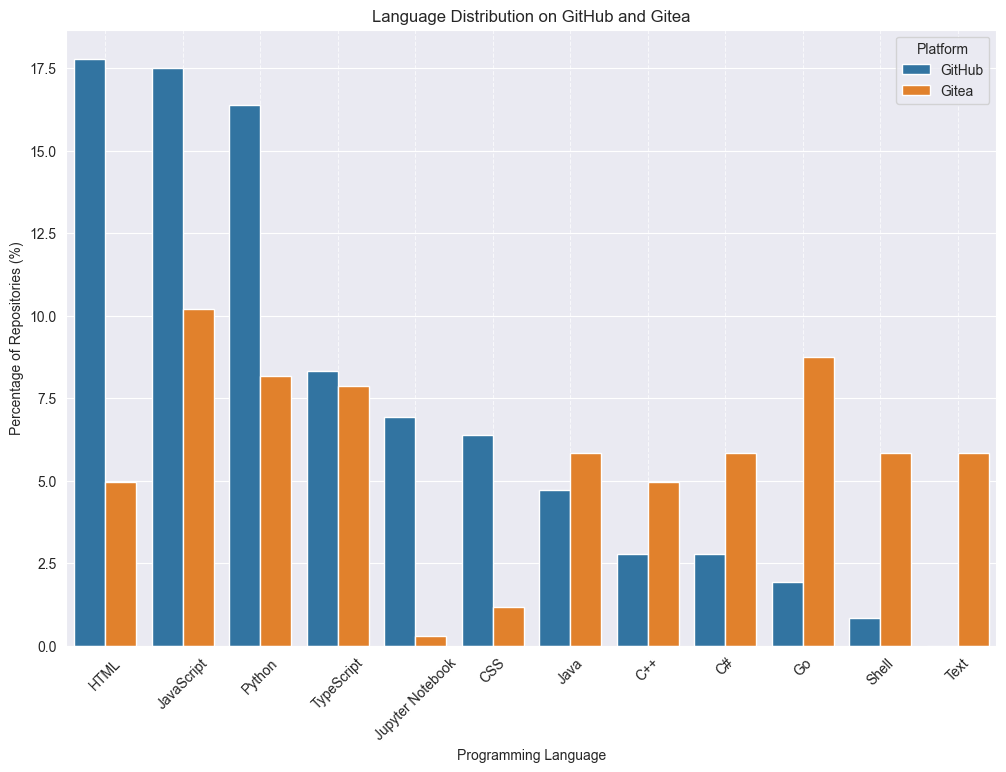

In [2]:
from platform_analysis import plot_language_distribution, plot_distribution

df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")
df_forgejo = pd.read_csv("forgejo_repos_0_500.csv")

# Create the figures
plot_language_distribution(df_github, df_gitea)


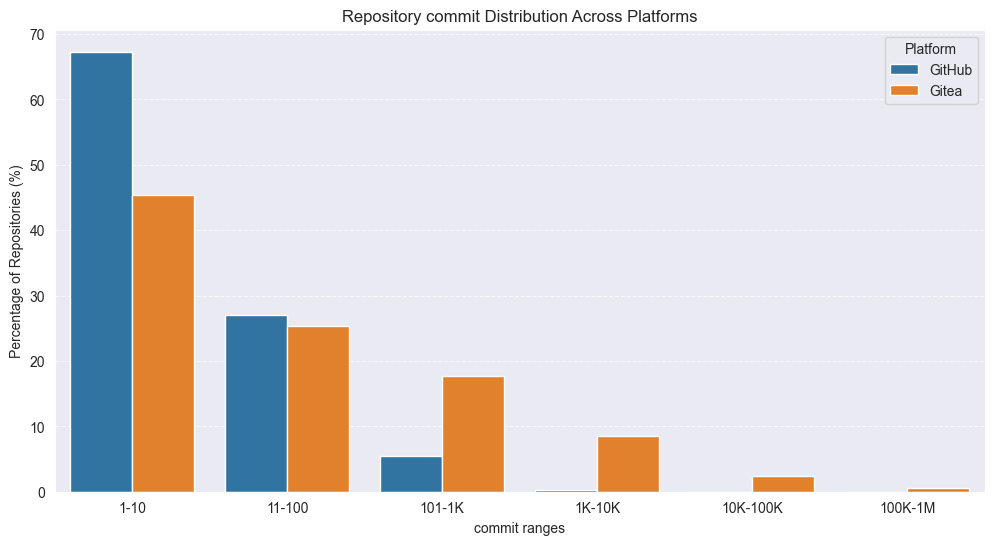

In [3]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

plot_distribution(df_github, df_gitea, Metrics.COMMIT)


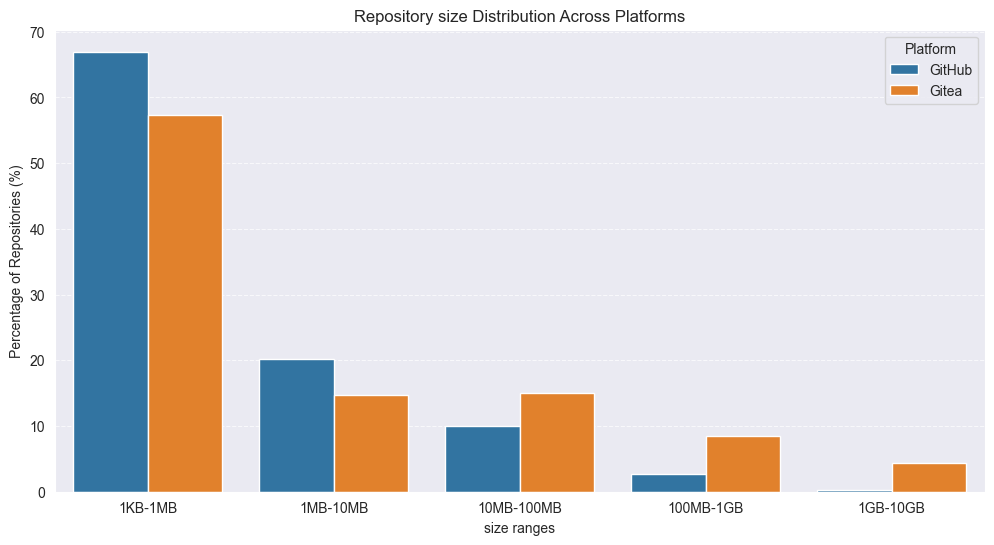

In [4]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

plot_distribution(df_github, df_gitea, Metrics.SIZE)

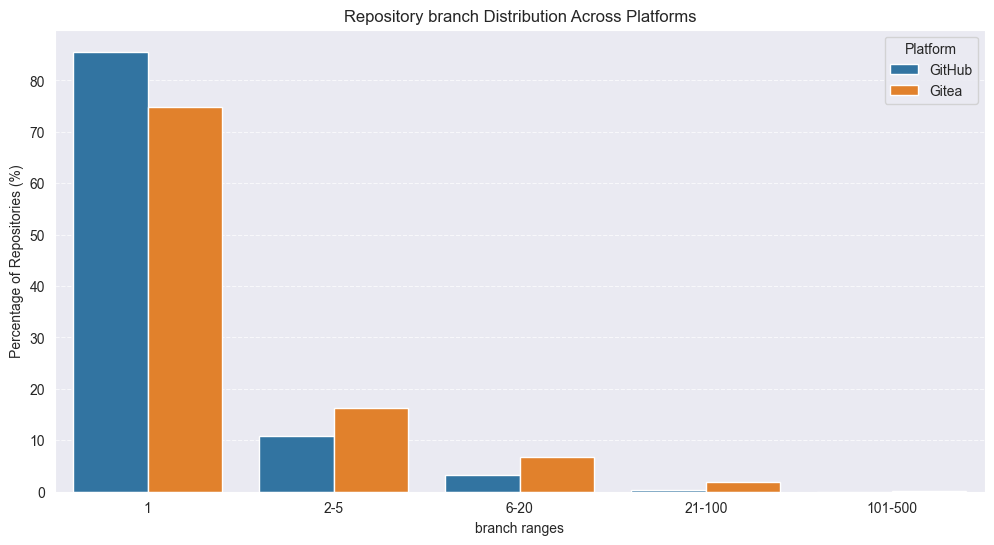

In [5]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

plot_distribution(df_github, df_gitea, Metrics.BRANCH)


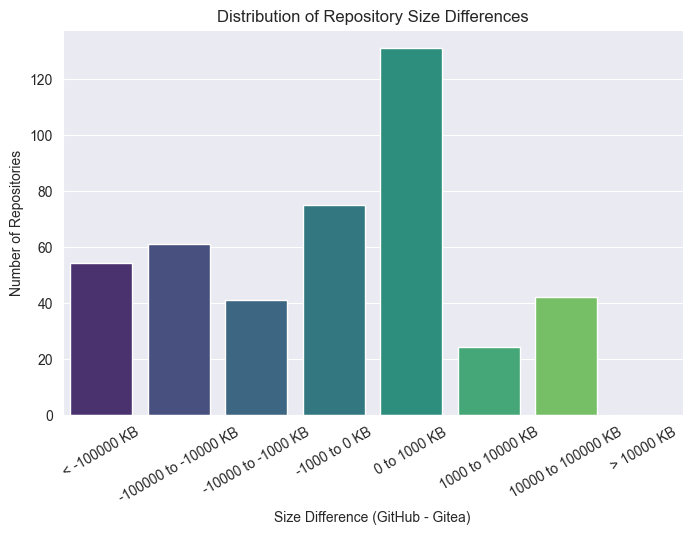

In [27]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "Size" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Branches"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Size Difference
df_matched_control["Matched Size"] = df_matched_treated["Size"].values
df_matched_control["Size Difference"] = df_matched_treated["Size"].values - df_matched_control["Size"].values

# Define size difference bins (ranges)
bins = [-float("inf"), -100000, -10000, -1000, 0, 1000, 10000, 100000, float("inf")]
labels = ["< -100000 KB", "-100000 to -10000 KB", "-10000 to -1000 KB", "-1000 to 0 KB", "0 to 1000 KB", "1000 to 10000 KB", "10000 to 100000 KB", "> 10000 KB"]

# Create a new column to categorize size differences
df_matched_control["Size Difference Range"] = pd.cut(df_matched_control["Size Difference"], bins=bins, labels=labels)

# Count occurrences of each range
size_diff_counts = df_matched_control["Size Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=size_diff_counts.index, y=size_diff_counts.values, hue=size_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Size Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Size Differences")
plt.xticks(rotation=30)
plt.show()

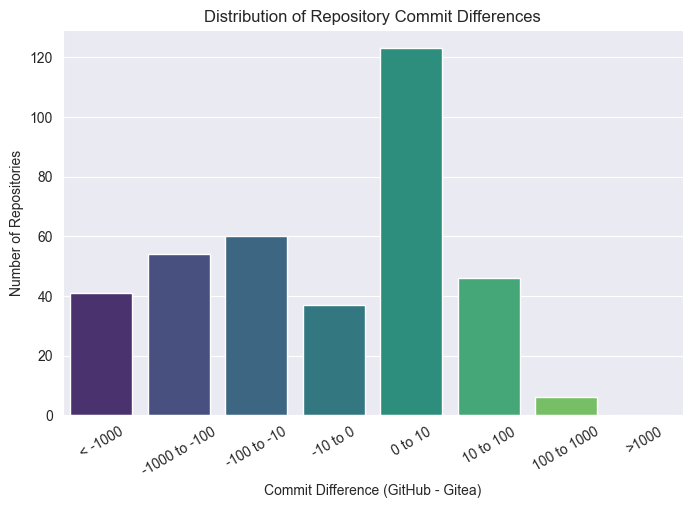

In [31]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "#Commits" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Branches"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Commit Difference
df_matched_control["Matched Commits"] = df_matched_treated["#Commits"].values
df_matched_control["Commit Difference"] = df_matched_treated["#Commits"].values - df_matched_control["#Commits"].values

# Define commit difference bins (ranges)
bins = [-float("inf"), -1000, -100, -10, 0, 10, 100, 1000, float("inf")]
labels = ["< -1000", "-1000 to -100", "-100 to -10", "-10 to 0", "0 to 10", "10 to 100", "100 to 1000", ">1000"]

# Create a new column to categorize commit differences
df_matched_control["Commit Difference Range"] = pd.cut(df_matched_control["Commit Difference"], bins=bins, labels=labels)

# Count occurrences of each range
commit_diff_counts = df_matched_control["Commit Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=commit_diff_counts.index, y=commit_diff_counts.values, hue=commit_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Commit Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Commit Differences")
plt.xticks(rotation=30)
plt.show()


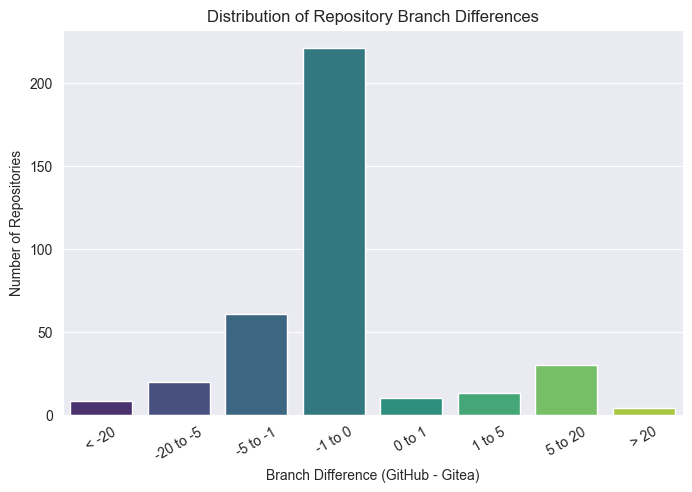

In [32]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "#Branches" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Commits"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Branch Difference
df_matched_control["Matched Branches"] = df_matched_treated["#Branches"].values
df_matched_control["Branch Difference"] = df_matched_treated["#Branches"].values - df_matched_control["#Branches"].values

# Define branch difference bins (ranges)
bins = [-float("inf"), -20, -5, -1, 0, 1, 5, 20, float("inf")]
labels = ["< -20", "-20 to -5", "-5 to -1", "-1 to 0", "0 to 1", "1 to 5", "5 to 20", "> 20"]

# Create a new column to categorize branch differences
df_matched_control["Branch Difference Range"] = pd.cut(df_matched_control["Branch Difference"], bins=bins, labels=labels)

# Count occurrences of each range
branch_diff_counts = df_matched_control["Branch Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_diff_counts.index, y=branch_diff_counts.values, hue=branch_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Branch Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Branch Differences")
plt.xticks(rotation=30)
plt.show()
